In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import pandas_datareader as pdr
import matplotlib.pyplot as plt

import pandas_datareader.data as web 
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [2]:
One_rws = pd.read_csv('2020_rws.csv', skiprows=1)
two_rws = pd.read_csv('2021_rws.csv')

In [3]:
rws = two_rws.iloc[:, :20]
new_column_names = [
    'id', 'year_of_birth', 'gender', 'timeAtCurrentJob', 'industry', 'occupation', 'company_size', 'household_type',
    'metroOrRegional','timePreferredWorkingRemotely','timeSpendWorkingRemotely', 'workTimePreferredRemotely', 'IfCOVID19CuredTimePreferRemotely',
    'employerUpdatedRemotePolicySinceCOVID19', 'hybridWorkLastSixMonths','hybridFreq', 'inOfficepolicy', 'timeSpentInOffice', 'remoteChooseOptions', 'daysRemoteOptions']

rws.columns = new_column_names 
rws.set_index('id',inplace=True)
rws.fillna('No info', inplace=True)
rws.drop('workTimePreferredRemotely',axis=1, inplace=True)
rws.head()

,year_of_birth,gender,timeAtCurrentJob,industry,occupation,company_size,household_type,metroOrRegional,timePreferredWorkingRemotely,timeSpendWorkingRemotely,IfCOVID19CuredTimePreferRemotely,employerUpdatedRemotePolicySinceCOVID19,hybridWorkLastSixMonths,hybridFreq,inOfficepolicy,timeSpentInOffice,remoteChooseOptions,daysRemoteOptions
id,,,,,,,,,,,,,,,,,,
1,1976,Male,More than 5 years,Other Services,Professionals - ICT Professionals,More than 200,Couple with dependent children,Metro,50% - I spent about half of my time remote working,80%,80%,80%,Yes,Yes,50% - About half of my time,80%,Yes,40%
2,1971,Male,More than 5 years,Construction,Professionals - ICT Professionals,More than 200,Couple with no dependent children,Metro,10%,50% - About half of my time,50% - About half of my time,50% - About half of my time,No,Yes,10%,Less than 10% of my time,Yes,100% - All of my time
3,1978,Female,Between 6 and 12 months,Financial and Insurance,"Professionals - Business, Human Resource and Marketing Professionals",More than 200,Single person,Metro,100% - I spent all of my time remote working,100% - All of my time,90%,60%,Yes,No,No info,No info,Yes,20%
4,1962,Female,Between 1 and 5 years,Health Care and Social Assistance,Professionals - Health Professionals,Between 20 and 199,One parent family with dependent children,Regional,40%,40%,40%,40%,Yes,Yes,40%,40%,Yes,50% - About half of my time
5,1974,Male,More than 5 years,Financial and Insurance,Managers - Specialist Managers,More than 200,Couple with dependent children,Regional,100% - I spent all of my time remote working,100% - All of my time,100% - All of my time,100% - All of my time,No,No,No info,No info,No,No info


In [4]:
import pandas as pd

industry_dummies = pd.get_dummies(rws[rws.columns])
rws_with_dummies = pd.concat([rws, industry_dummies], axis=1)


In [5]:
print(rws_with_dummies.columns)


Index(['year_of_birth', 'gender', 'timeAtCurrentJob', 'industry', 'occupation', 'company_size', 'household_type', 'metroOrRegional', 'timePreferredWorkingRemotely', 'timeSpendWorkingRemotely',
       ...
       'daysRemoteOptions_20%', 'daysRemoteOptions_30%', 'daysRemoteOptions_40%', 'daysRemoteOptions_50% - About half of my time', 'daysRemoteOptions_60%', 'daysRemoteOptions_70%', 'daysRemoteOptions_80%', 'daysRemoteOptions_90%', 'daysRemoteOptions_Less than 10% of my time', 'daysRemoteOptions_No info'], dtype='object', length=192)


In [6]:
rws_with_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_birth,1512.0,1979.226190,11.836707,1957.0,1970.0,1980.0,1989.0,2002.0
year_of_birth,1512.0,1979.226190,11.836707,1957.0,1970.0,1980.0,1989.0,2002.0
gender_Female,1512.0,0.519180,0.499797,0.0,0.0,1.0,1.0,1.0
gender_I would rather not say,1512.0,0.001984,0.044514,0.0,0.0,0.0,0.0,1.0
gender_Male,1512.0,0.478175,0.499689,0.0,0.0,0.0,1.0,1.0
gender_Other,1512.0,0.000661,0.025717,0.0,0.0,0.0,0.0,1.0
timeAtCurrentJob_Between 1 and 5 years,1512.0,0.408730,0.491762,0.0,0.0,0.0,1.0,1.0
timeAtCurrentJob_Between 6 and 12 months,1512.0,0.117063,0.321602,0.0,0.0,0.0,0.0,1.0
timeAtCurrentJob_More than 5 years,1512.0,0.474206,0.499499,0.0,0.0,0.0,1.0,1.0
industry_Accommodation and Food,1512.0,0.017857,0.132476,0.0,0.0,0.0,0.0,1.0


In [7]:
rws_numerical_describe = rws.describe()
print(rws_numerical_describe)


       year_of_birth
count    1512.000000
mean     1979.226190
std        11.836707
min      1957.000000
25%      1970.000000
50%      1980.000000
75%      1989.000000
max      2002.000000


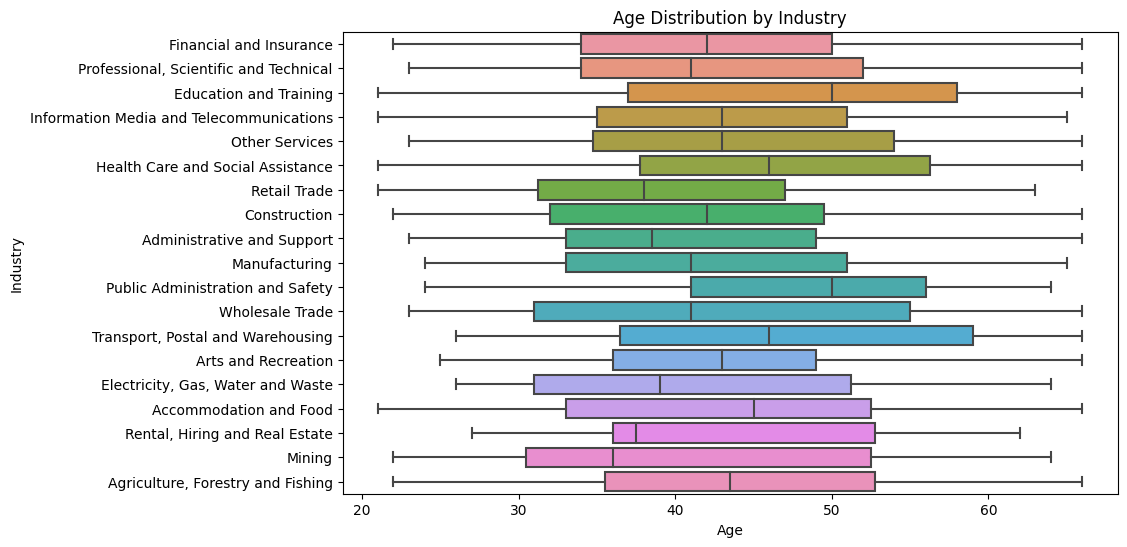

In [8]:
# Calculate age from the year_of_birth column
rws['age'] = 2023 - rws['year_of_birth']

plt.figure(figsize=(10, 6))
sns.boxplot(data=rws, x='age', y='industry', order=rws['industry'].value_counts().index)
plt.title('Age Distribution by Industry')
plt.xlabel('Age')
plt.ylabel('Industry')
plt.show()


In [9]:
industry_dummies.mean()

year_of_birth                                                                                          1979.226190
gender_Female                                                                                             0.519180
gender_I would rather not say                                                                             0.001984
gender_Male                                                                                               0.478175
gender_Other                                                                                              0.000661
timeAtCurrentJob_Between 1 and 5 years                                                                    0.408730
timeAtCurrentJob_Between 6 and 12 months                                                                  0.117063
timeAtCurrentJob_More than 5 years                                                                        0.474206
industry_Accommodation and Food                                                 

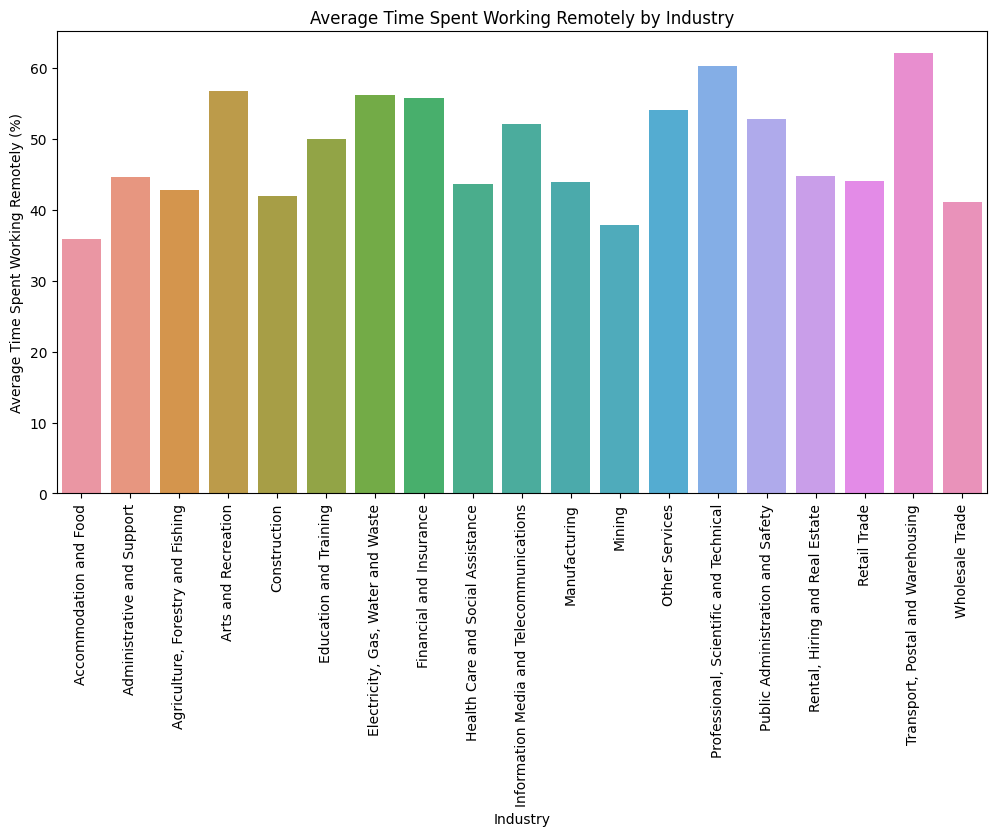

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def convert_to_numeric(value):
    if value.endswith('%'):
        return float(value.rstrip('%'))
    else:
        return None

rws_with_dummies['timeSpendWorkingRemotely_numeric'] = rws_with_dummies['timeSpendWorkingRemotely'].apply(convert_to_numeric)

industry_remote = rws_with_dummies.groupby('industry')['timeSpendWorkingRemotely_numeric'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='industry', y='timeSpendWorkingRemotely_numeric', data=industry_remote)
plt.xticks(rotation=90)
plt.xlabel("Industry")
plt.ylabel("Average Time Spent Working Remotely (%)")
plt.title("Average Time Spent Working Remotely by Industry")
plt.show()


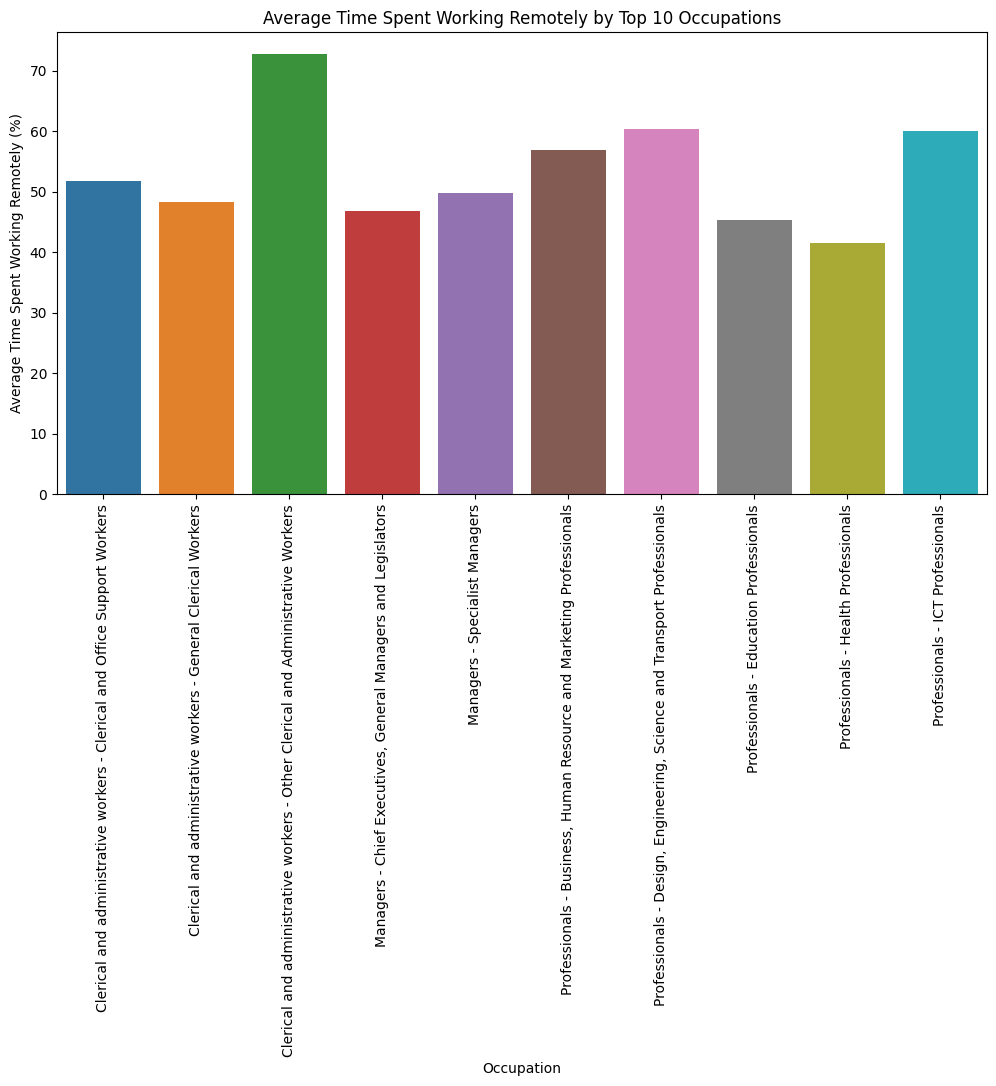

In [11]:
top_occupations = rws_with_dummies['occupation'].value_counts().nlargest(10).index

top_occupations_data = rws_with_dummies[rws_with_dummies['occupation'].isin(top_occupations)]

occupation_remote = top_occupations_data.groupby('occupation')['timeSpendWorkingRemotely_numeric'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='timeSpendWorkingRemotely_numeric', data=occupation_remote)
plt.xticks(rotation=90)
plt.xlabel("Occupation")
plt.ylabel("Average Time Spent Working Remotely (%)")
plt.title("Average Time Spent Working Remotely by Top 10 Occupations")
plt.show()


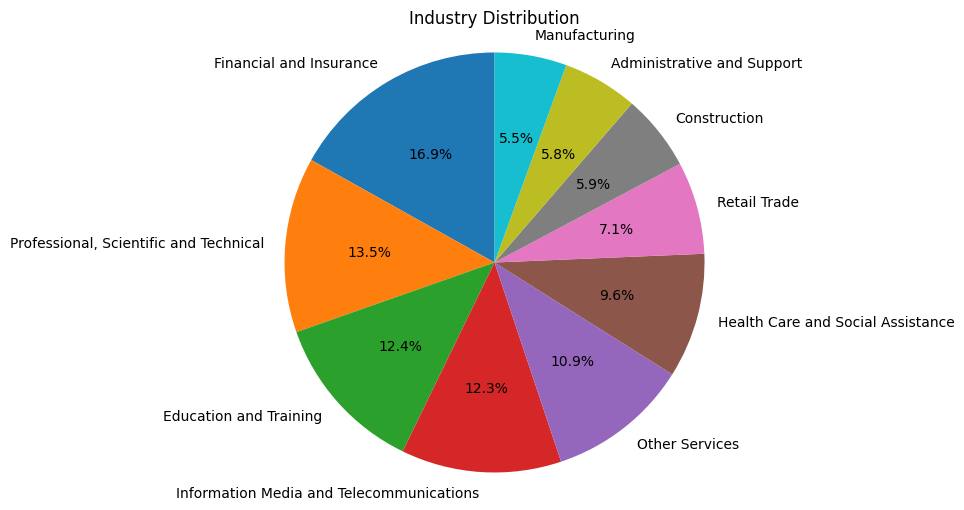

In [21]:
industry_counts = rws_with_dummies['industry'].value_counts().nlargest(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Industry Distribution')
plt.show()


Below here is still under development

In [12]:
print("year_of_birth" in rws_with_dummies.columns)
print("timeSpendWorkingRemotely_numeric" in rws_with_dummies.columns)


True
True


In [13]:
rws_cleaned = rws_with_dummies.dropna(subset=['year_of_birth', 'timeSpendWorkingRemotely_numeric'])
rws_filled = rws_with_dummies.copy()
rws_filled['timeSpendWorkingRemotely_numeric'] = rws_filled['timeSpendWorkingRemotely_numeric'].fillna(rws_filled['timeSpendWorkingRemotely_numeric'].mean())


In [16]:
rws_cleaned['year_of_birth'] = rws_cleaned['year_of_birth'].squeeze()
rws_cleaned['timeSpendWorkingRemotely_numeric'] = rws_cleaned['timeSpendWorkingRemotely_numeric'].squeeze()


C:\Users\JBarr\AppData\Local\Temp\ipykernel_64648\2746022571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_cleaned['year_of_birth'] = rws_cleaned['year_of_birth'].squeeze()
C:\Users\JBarr\AppData\Local\Temp\ipykernel_64648\2746022571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rws_cleaned['timeSpendWorkingRemotely_numeric'] = rws_cleaned['timeSpendWorkingRemotely_numeric'].squeeze()


In [ ]:
import pandas as pd

import pandas as pd

rws['year_of_birth'] = rws['year_of_birth'].astype(int)
rws['gender'] = rws['gender'].astype('category')


rws['hours_worked_per_week'] = pd.to_numeric(rws['hours_worked_per_week']).astype('Int64')
rws['time_spend_on_childcare'] = pd.to_numeric(rws['time_spend_on_childcare']).astype('Int64')
rws['time_spend_on_eldercare'] = pd.to_numeric(rws['time_spend_on_eldercare']).astype('Int64')
rws['time_spend_on_housework'] = pd.to_numeric(rws['time_spend_on_housework']).astype('Int64')
rws['time_spend_on_education'] = pd.to_numeric(rws['time_spend_on_education']).astype('Int64')
rws['time_spend_on_socializing'] = pd.to_numeric(rws['time_spend_on_socializing']).astype('Int64')
rws['time_spend_on_sports'] = pd.to_numeric(rws['time_spend_on_sports']).astype('Int64')


rws['industry'] = rws['industry'].astype('category')
rws['sub_industry'] = rws['sub_industry'].astype('category')
rws['job_function'] = rws['job_function'].astype('category')
rws['detailed_job_function'] = rws['detailed_job_function'].astype('category')
rws['company_size'] = rws['company_size'].astype('category')
rws['management_position'] = rws['management_position'].astype('category')
rws['household_type'] = rws['household_type'].astype('category')
rws['remote_experience'] = rws['remote_experience'].astype('category')
rws['location_type'] = rws['location_type'].astype('category')
rws['frequency_of_commute'] = rws['frequency_of_commute'].astype('category')
rws['remote_work_preference'] = rws['remote_work_preference'].astype('category')
rws['productivity'] = rws['productivity'].astype('category')
rws['mental_health_impact'] = rws['mental_health_impact'].astype('category')
rws['work_life_balance'] = rws['work_life_balance'].astype('category')
rws['career_advancement'] = rws['career_advancement'].astype('category')
rws['job_satisfaction'] = rws['job_satisfaction'].astype('category')
rws['manager_support'] = rws['manager_support'].astype('category')
rws['company_support'] = rws['company_support'].astype('category')
rws['preferred_percentage_of_remote_work'] = rws['preferred_percentage_of_remote_work'].astype('category')
rws['actual_percentage_of_remote_work'] = rws['actual_percentage_of_remote_work'].astype('category')
rws['perceived_productivity'] = rws['perceived_productivity'].astype('category')
rws['perceived_mental_health_impact'] = rws['perceived_mental_health_impact'].astype('category')
rws['perceived_work_life_balance'] = rws['perceived_work_life_balance'].astype('category')
rws['perceived_career_advancement'] = rws['perceived_career_advancement'].astype('category')
rws['number_of_working_days'] = rws['number_of_working_days'].astype('category')
rws['number_of_working_hours'] = rws['number_of_working_hours'].astype('category')

print(rws.dtypes)
